In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# read the online file by the URL provides above, and assign it to variable "df"
path="https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"
df = pd.read_csv(path,header=None)  # No headings for this data 

In [24]:
df = pd.read_csv("data.csv",header=None)  # Load without headers

In [25]:
df.shape

(205, 26)

In [26]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

In [27]:
df.columns = headers
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null object
stroke               205 non-null object
compression-ratio    205 non-null float64
horsepower           205 non-nul

In [29]:
df.isna().sum()   # count null values in each column 

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

### Remove rows with ? in  price 

In [30]:
df[df['price'] == '?']   # rows with ? in price

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?


In [31]:
# Drop rows with ? in price 
df.drop(df.loc[df['price'] == '?'].index, axis=0, inplace=True)

In [32]:
df.shape

(201, 26)

In [33]:
# Change type of price from object to float 
df['price'] = df['price'].astype('float')

In [34]:
# pick up only required fields 
features = ['make','fuel-type','num-of-doors','body-style','drive-wheels','engine-size','horsepower','city-mpg','highway-mpg','price']
cars = df.loc[: , features]

In [35]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
make            201 non-null object
fuel-type       201 non-null object
num-of-doors    201 non-null object
body-style      201 non-null object
drive-wheels    201 non-null object
engine-size     201 non-null int64
horsepower      201 non-null object
city-mpg        201 non-null int64
highway-mpg     201 non-null int64
price           201 non-null float64
dtypes: float64(1), int64(3), object(6)
memory usage: 17.3+ KB


In [36]:
cars[ cars.horsepower == '?']  # rows with ? in horsepower 

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-size,horsepower,city-mpg,highway-mpg,price
130,renault,gas,four,wagon,fwd,132,?,23,31,9295.0
131,renault,gas,two,hatchback,fwd,132,?,23,31,9895.0


In [37]:
cars[ cars['num-of-doors'] == '?']  # rows with ? in num-of-doors

,make,fuel-type,num-of-doors,body-style,drive-wheels,engine-size,horsepower,city-mpg,highway-mpg,price
27,dodge,gas,?,sedan,fwd,98,102,24,30,8558.0
63,mazda,diesel,?,sedan,fwd,122,64,36,42,10795.0


## Univariate Analysis

### Price

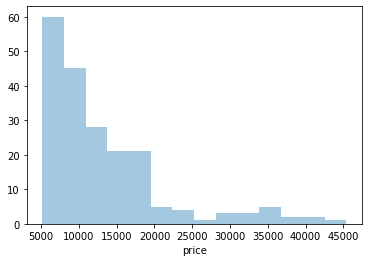

In [38]:
sns.distplot(cars['price'], kde=False)

In [39]:
cars['price'].describe()

count      201.000000
mean     13207.129353
std       7947.066342
min       5118.000000
25%       7775.000000
50%      10295.000000
75%      16500.000000
max      45400.000000
Name: price, dtype: float64

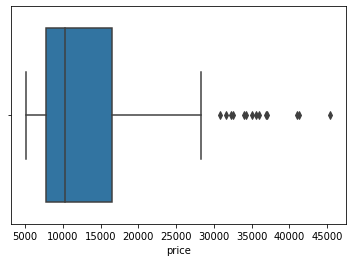

In [40]:
sns.boxplot(cars['price'])

### fuel-type

In [41]:
cars['fuel-type'].value_counts()

gas       181
diesel     20
Name: fuel-type, dtype: int64

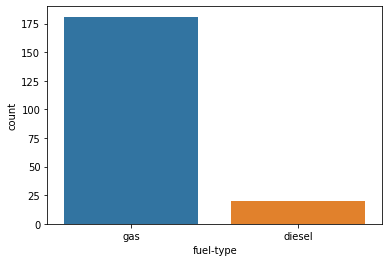

In [42]:
sns.countplot(cars['fuel-type'])

In [43]:
cars.groupby('fuel-type')['price'].mean()

fuel-type
diesel    15838.15000
gas       12916.40884
Name: price, dtype: float64

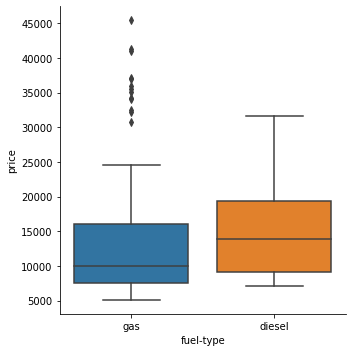

In [44]:
sns.catplot(x='fuel-type',y="price", data=cars, kind='box')

### make

In [45]:
cars['make'].unique().size

22

In [46]:
cars['make'].value_counts()

toyota           32
nissan           18
mazda            17
honda            13
mitsubishi       13
subaru           12
volkswagen       12
volvo            11
peugot           11
dodge             9
bmw               8
mercedes-benz     8
plymouth          7
audi              6
saab              6
porsche           4
chevrolet         3
jaguar            3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64

In [47]:
cars.groupby('make')['price'].mean().sort_values(ascending=False)

make
jaguar           34600.000000
mercedes-benz    33647.000000
porsche          31400.500000
bmw              26118.750000
volvo            18063.181818
audi             17859.166667
mercury          16503.000000
alfa-romero      15498.333333
peugot           15489.090909
saab             15223.333333
mazda            10652.882353
nissan           10415.666667
volkswagen       10077.500000
toyota            9885.812500
renault           9595.000000
mitsubishi        9239.769231
isuzu             8916.500000
subaru            8541.250000
honda             8184.692308
plymouth          7963.428571
dodge             7875.444444
chevrolet         6007.000000
Name: price, dtype: float64

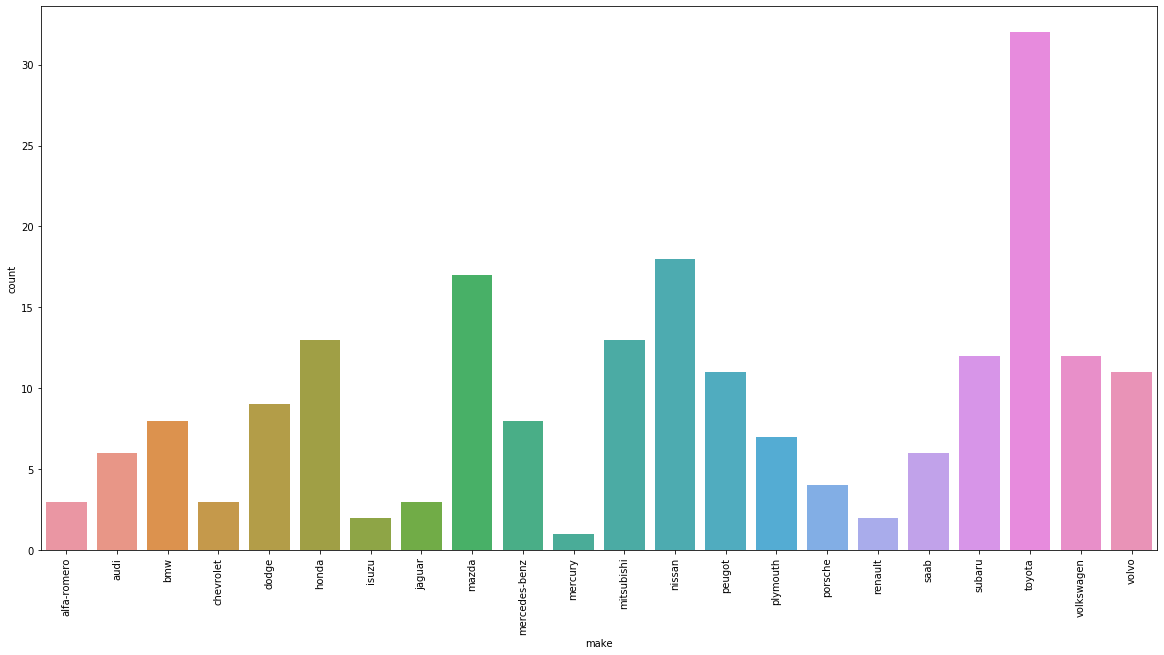

In [48]:
# Understand distribution of make
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.countplot(cars['make'])

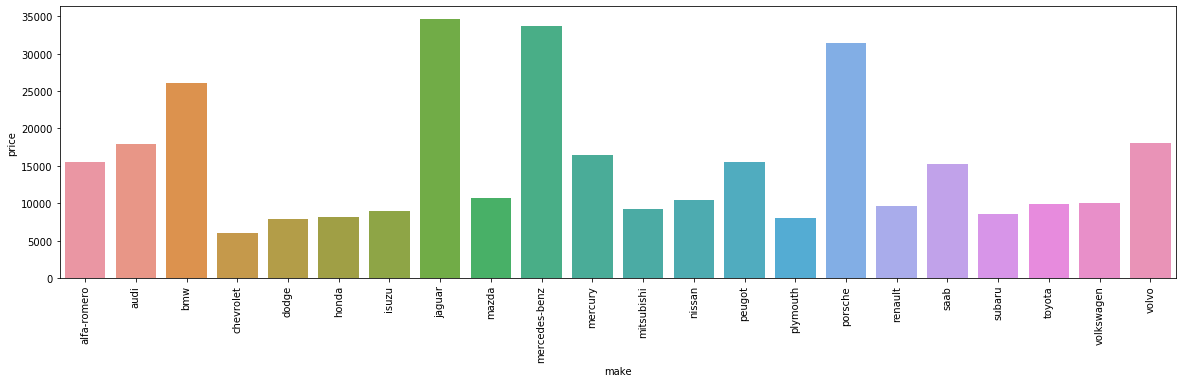

In [49]:
g = cars.groupby('make', as_index = False)['price'].mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['price'])

### Body-style

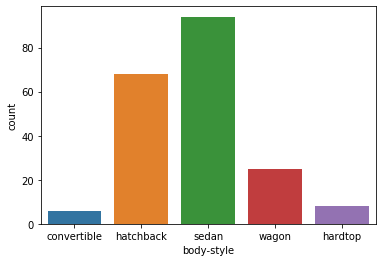

In [50]:
# Understand distribution of fuel-type
sns.countplot(cars['body-style'])

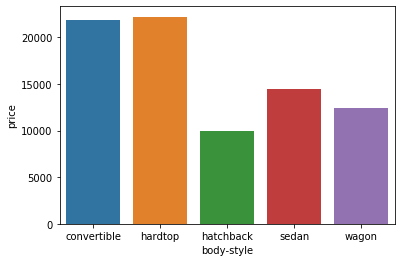

In [51]:
g = cars.groupby('body-style', as_index = False)['price'].mean()
sns.barplot(g['body-style'], g['price'])

## num-of-doors

In [52]:
cars['num-of-doors'].value_counts()

four    113
two      86
?         2
Name: num-of-doors, dtype: int64

In [53]:
# Replace ? in no-of-doors with mode of no-of-doors
cars.loc[cars['num-of-doors'] == '?', 'num-of-doors'] = cars['num-of-doors'].mode()[0]

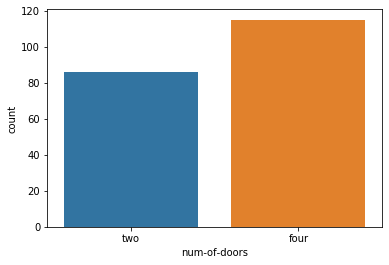

In [54]:
# Understand distribution of fuel-type
sns.countplot(cars['num-of-doors'])

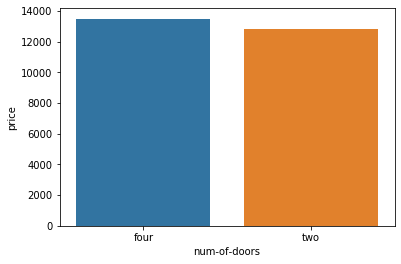

In [55]:
g = cars[['num-of-doors','price']].groupby('num-of-doors', as_index = False).mean()
sns.barplot(g['num-of-doors'], g['price'])

### drive-wheel

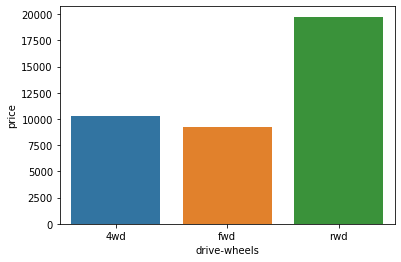

In [58]:
g = cars[['drive-wheels','price']].groupby('drive-wheels', as_index = False).mean()
sns.barplot(g['drive-wheels'], g['price'])

### engine-size

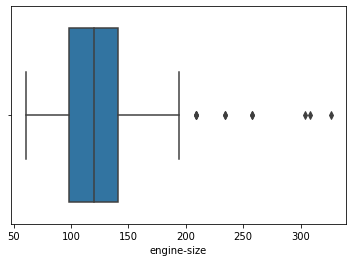

In [59]:
# Understand distribution of engine-size
sns.boxplot(cars['engine-size'])

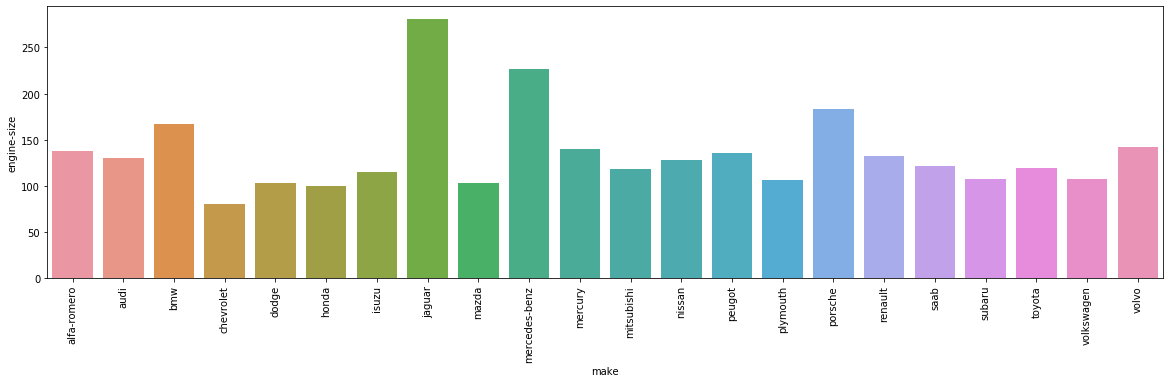

In [60]:
g = cars[['make','engine-size']].groupby('make', as_index = False).mean()
#print(g)
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['engine-size'])

### city-mpg and highway-mpg

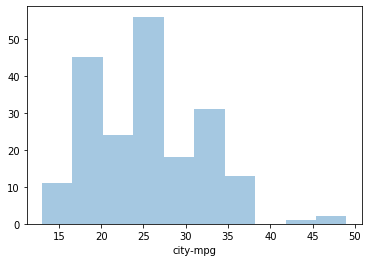

In [61]:
# Understand distribution of city-mpg
sns.distplot(cars['city-mpg'], hist=True, kde=False)

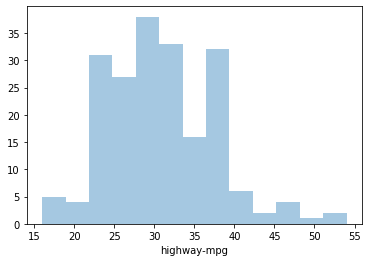

In [39]:
# Understand distribution of highway-mpg
sns.distplot(cars['highway-mpg'], kde=False)

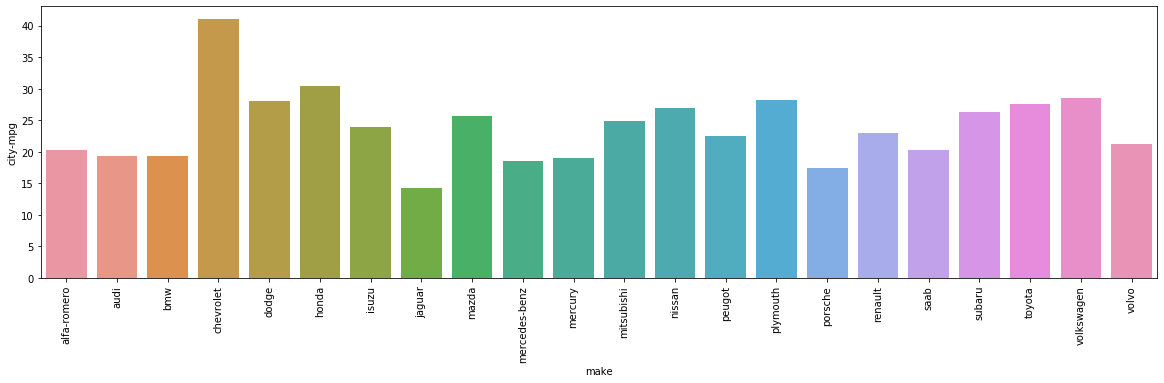

In [62]:
g = cars[['make','city-mpg']].groupby('make', as_index = False).mean()
plt.gcf().set_size_inches(20,5)
plt.xticks(rotation='vertical')
sns.barplot(g['make'], g['city-mpg'])

In [63]:
# find out how many ? are present in each column 
col_q_count = cars.apply(lambda v : (v == '?').sum()) # Apply lambda for each column 
print(col_q_count)

make            0
fuel-type       0
num-of-doors    0
body-style      0
drive-wheels    0
engine-size     0
horsepower      2
city-mpg        0
highway-mpg     0
price           0
dtype: int64


In [64]:
hp_median = cars.loc[cars['horsepower'] != '?', 'horsepower'].median()
print(hp_median)

95.0


In [65]:
# replace ? in horsepower with median()
cars.loc[ cars['horsepower'] == '?', 'horsepower'] = hp_median
cars['horsepower'] = cars['horsepower'].astype('float')

In [66]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 0 to 204
Data columns (total 10 columns):
make            201 non-null object
fuel-type       201 non-null object
num-of-doors    201 non-null object
body-style      201 non-null object
drive-wheels    201 non-null object
engine-size     201 non-null int64
horsepower      201 non-null float64
city-mpg        201 non-null int64
highway-mpg     201 non-null int64
price           201 non-null float64
dtypes: float64(2), int64(3), object(5)
memory usage: 27.3+ KB


In [67]:
cars.to_csv('final_cars.csv', index=False)

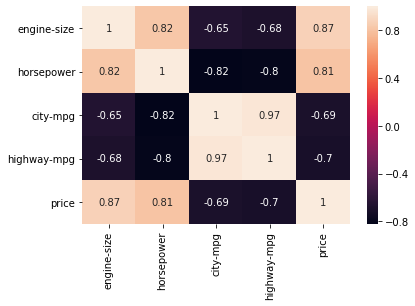

In [68]:
sns.heatmap(cars.corr(), annot=True)

In [69]:
## Compare make with price 
g = cars.groupby('make', as_index=False)['price'].mean()

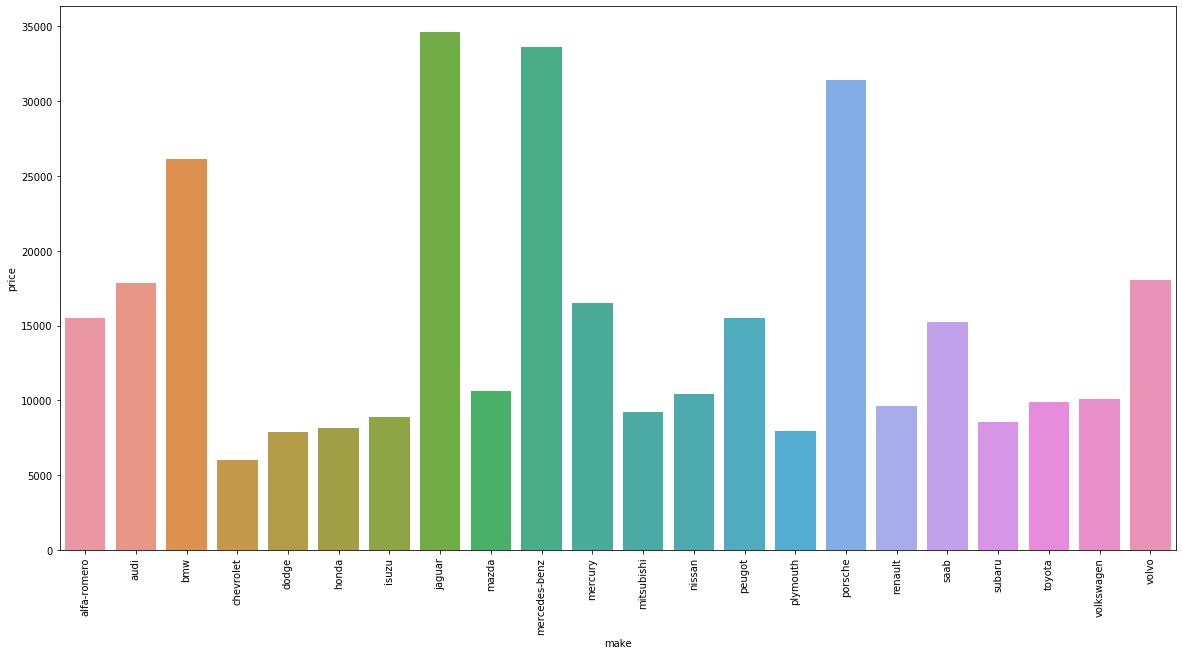

In [70]:
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')
sns.barplot(y='price',x ='make', data=g)

In [72]:
## Compare city-mpg and highway-mpg for each make 
g = cars.groupby('make', as_index=False)['city-mpg','highway-mpg'].mean()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

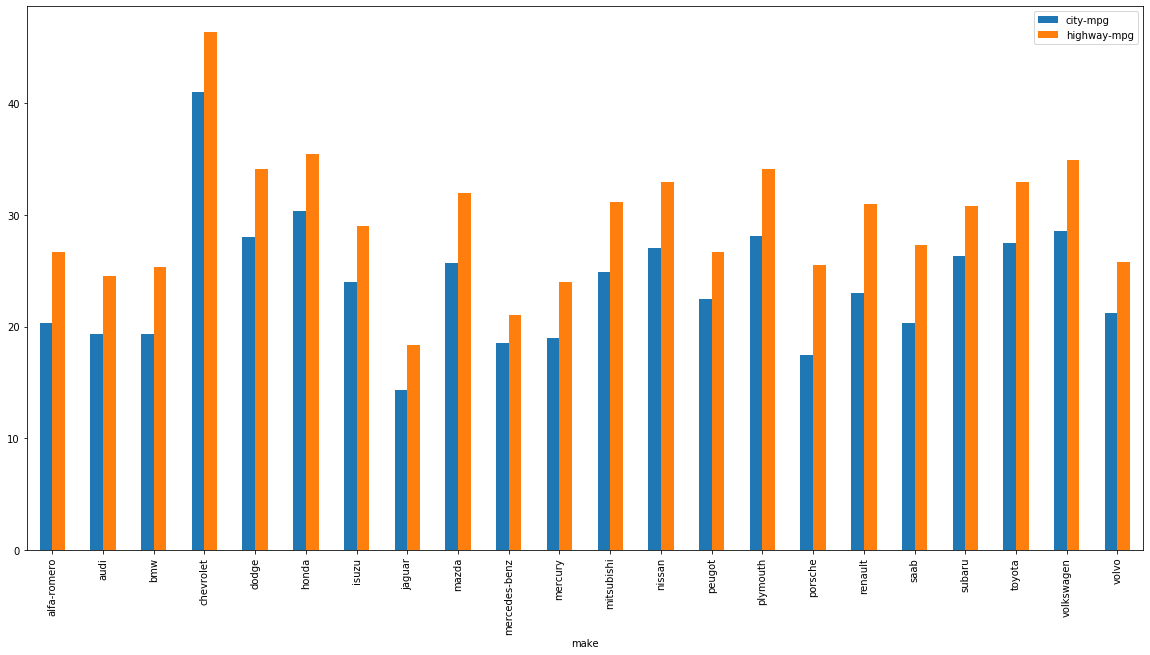

In [73]:
## Compare city-mpg and highway-mpg for each make  with bar graph
g.plot(x='make',kind='bar')
plt.gcf().set_size_inches(20,10)
plt.xticks(rotation='vertical')

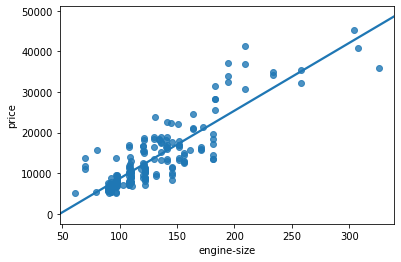

In [74]:
# Compare Engine size with price 
sns.regplot(x ="engine-size", y = 'price', data = cars,ci=False)

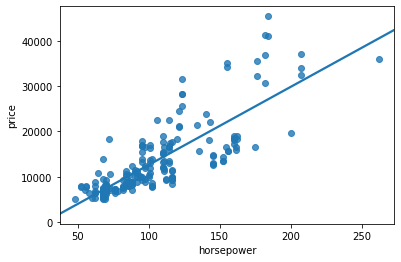

In [75]:
# Compare horsepower with price 
sns.regplot(x ="horsepower", y = 'price', data = cars,ci=False)

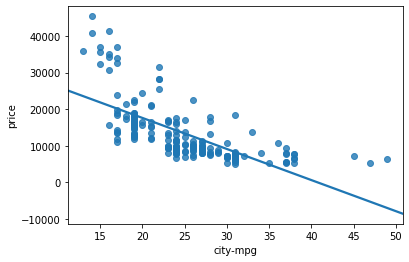

In [76]:
# Compare city-mpg with price 
sns.regplot(x ="city-mpg", y = 'price', data = cars, ci = False)

## Save final DF

In [77]:
# drop make
cars.drop('make',axis=1,inplace=True)

In [78]:
#Convert categorical variables to dummies
cars = pd.get_dummies(cars)

In [79]:
cars.columns

Index(['engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price',
       'fuel-type_diesel', 'fuel-type_gas', 'num-of-doors_four',
       'num-of-doors_two', 'body-style_convertible', 'body-style_hardtop',
       'body-style_hatchback', 'body-style_sedan', 'body-style_wagon',
       'drive-wheels_4wd', 'drive-wheels_fwd', 'drive-wheels_rwd'],
      dtype='object')

In [80]:
cars.shape

(201, 17)

In [81]:
cars.to_csv("final_cars.csv",index=False)

## Build model using LinearRegression

In [ ]:
cars = pd.read_csv("final_cars.csv")

In [82]:
## create X and Y
y = cars['price']
X = cars.drop(columns=['price'])

In [83]:
X.shape,y.shape

((201, 16), (201,))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [28]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [76]:
# Display coefficient for each column
for t in zip(X_train.columns, model.coef_):
  print(f"{t[0]:25s} {t[1]}")

engine-size               95.49343491709142
horsepower                34.69269675189038
city-mpg                  145.06541216638104
highway-mpg               -328.2991753492577
fuel-type_diesel          1990.029517120534
fuel-type_gas             -1990.0295171205366
num-of-doors_four         117.4656698135416
num-of-doors_two          -117.465669813542
body-style_convertible    1763.0705844398487
body-style_hardtop        256.9173794656706
body-style_hatchback      -1332.5103614254808
body-style_sedan          247.5600540111192
body-style_wagon          -935.0376564911578
drive-wheels_4wd          -980.2587279477342
drive-wheels_fwd          -332.426893173478
drive-wheels_rwd          1312.6856211212128


In [77]:
model.intercept_

5554.702541963157

In [29]:
y_pred = model.predict(X_test)

In [31]:
np.mean(y_pred - y_test)

-412.10832867629716

In [80]:
model.score(X_test,y_test)

0.7985835208851861

In [32]:
## get MSE 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test,y_pred)
print(f"Mean Squared Error : {mse:0.2f}")

mae = mean_absolute_error(y_test,y_pred)
print(f"Mean Absolute Error : {mae:0.2f}")

r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Mean Squared Error : 15261385.41
Mean Absolute Error : 2883.21
R2 Score: 0.80


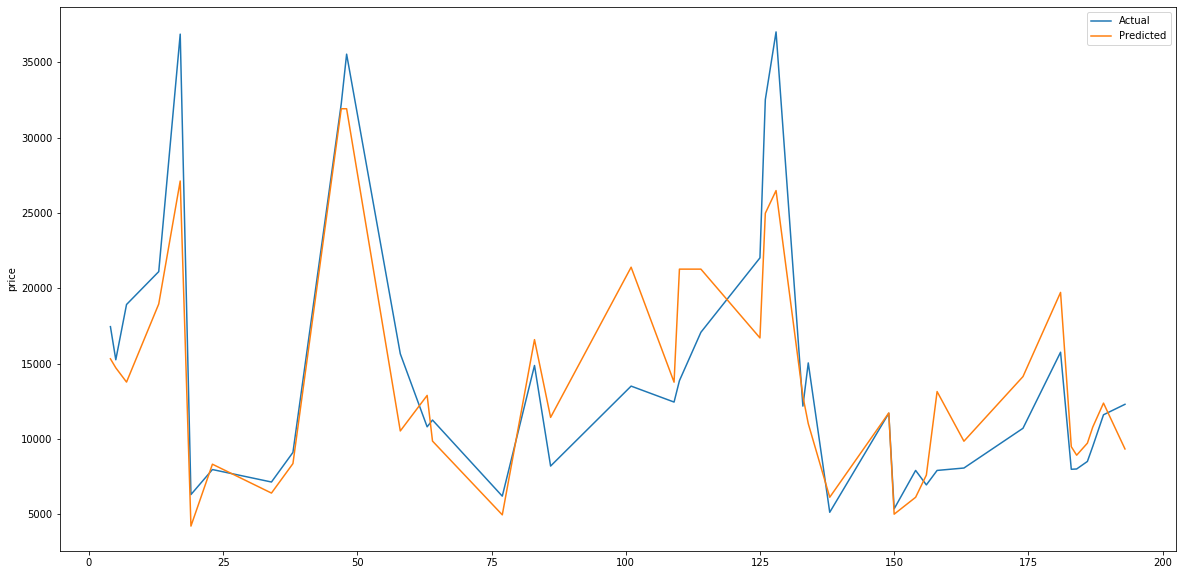

In [82]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### Micro model with 3 features 

In [33]:
# Micro model
X_micro =  X[['engine-size', 'horsepower', 'city-mpg']]
y_micro =  y

In [36]:
X_micro_train, X_micro_test, y_micro_train, y_micro_test = train_test_split(X_micro,y_micro, test_size=0.2, random_state=0)

In [37]:
micro_model = LinearRegression()
micro_model.fit(X_micro_train,y_micro_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [42]:
micro_model.score(X_micro_train,y_micro_train) # r2 for train data 

0.7765015468308566

In [39]:
y_micro_pred = micro_model.predict(X_micro_test)

In [40]:
from sklearn.metrics import r2_score
r2score = r2_score(y_micro_test,y_micro_pred)
print(f"R2 Score: {r2score:0.2f}")

R2 Score: 0.82


## RandomForestRegressor 

In [44]:
from sklearn.ensemble import RandomForestRegressor

In [49]:
model = RandomForestRegressor()
model.fit(X_train, y_train)
print('Train score ', model.score(X_train,y_train))
y_pred = model.predict(X_test)
r2score = r2_score(y_test,y_pred)
print(f"R2 Score: {r2score:0.2f}")

Train score  0.9707226636428286
R2 Score: 0.93


e:\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


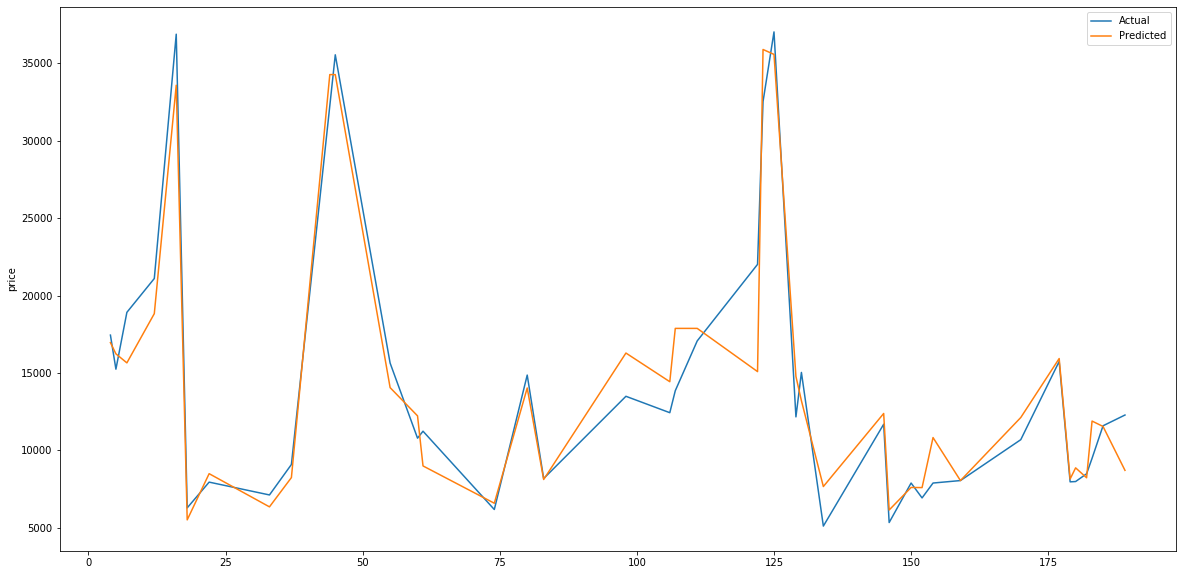

In [48]:
# Compare actual and predicted values
plt.gcf().set_size_inches(20,10)
sns.lineplot( y = y_test, x = X_test.index, label="Actual")
sns.lineplot( y = y_pred, x = X_test.index, label="Predicted")

### SGD

In [50]:
from sklearn.linear_model import SGDRegressor
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [51]:
model.score(X_test,y_test)

0.9345119234089516